In [1]:
# Import Dependencies
import pandas as pd
import requests
import json
from datetime import datetime
import dateutil
import matplotlib.pyplot as plt

In [2]:
   # Create a reference the CSV file desired
csv_path = "Parking_Violations_Issued_in_December_2018.csv"

# Read the CSV into a Pandas DataFrame
Parking2018 = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
Parking2018.head()


,X,Y,OBJECTID,ROWID_,DAY_OF_WEEK,HOLIDAY,WEEK_OF_YEAR,MONTH_OF_YEAR,ISSUE_TIME,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,BODY_STYLE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE
0,-77.026516,38.897354,5373144,NaN,NaN,NaN,NaN,NaN,NaN,P034,"METER, FAIL TO DEPOSIT PAYMENT",1000 BLOCK F ST NW SOUTH SIDE,DC,NaN,813477,11599.0,397700,136611,2018-12-07T10:09:00.000Z
1,-77.053032,38.899362,5373145,NaN,NaN,NaN,NaN,NaN,NaN,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,800 BLOCK NEW HAMPSHIRE AVE NW *,DC,NaN,811580,9940.0,395400,136835,2018-12-07T10:48:00.000Z
2,-77.031951,38.908045,5373146,NaN,NaN,NaN,NaN,NaN,NaN,P385,"STOPPING, STANDING OR PARKING VEHICLE IN BIKE ...",BLOCK 1400 14TH ST NW WEST SIDE,DC,NaN,802156,1804.0,397229,137798,2018-12-31T15:28:00.000Z
3,-77.027555,38.901335,5373147,NaN,NaN,NaN,NaN,NaN,NaN,P281,FAIL TO DISPLAY A MULTISPACE METER RECEIPT,1200 BLOCK EYE ST NW NORTH SIDE,DC,NaN,801091,919.0,397610,137053,2018-12-06T20:59:00.000Z
4,-77.007473,38.902527,5373148,NaN,NaN,NaN,NaN,NaN,NaN,P025,PARK LESS THAN 40 FEET FROM AN INTERSECTION,UNIT BLOCK K ST NE SOUTH SIDE,DC,NaN,808361,7159.0,399352,137185,2018-12-07T13:03:00.000Z


In [3]:
Parking2018 = Parking2018.drop(columns=["ROWID_","DAY_OF_WEEK",
                          "BODY_STYLE","HOLIDAY",
                          "WEEK_OF_YEAR","MONTH_OF_YEAR","ISSUE_TIME"])

Parking2018.head()

,X,Y,OBJECTID,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE
0,-77.026516,38.897354,5373144,P034,"METER, FAIL TO DEPOSIT PAYMENT",1000 BLOCK F ST NW SOUTH SIDE,DC,813477,11599.0,397700,136611,2018-12-07T10:09:00.000Z
1,-77.053032,38.899362,5373145,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,800 BLOCK NEW HAMPSHIRE AVE NW *,DC,811580,9940.0,395400,136835,2018-12-07T10:48:00.000Z
2,-77.031951,38.908045,5373146,P385,"STOPPING, STANDING OR PARKING VEHICLE IN BIKE ...",BLOCK 1400 14TH ST NW WEST SIDE,DC,802156,1804.0,397229,137798,2018-12-31T15:28:00.000Z
3,-77.027555,38.901335,5373147,P281,FAIL TO DISPLAY A MULTISPACE METER RECEIPT,1200 BLOCK EYE ST NW NORTH SIDE,DC,801091,919.0,397610,137053,2018-12-06T20:59:00.000Z
4,-77.007473,38.902527,5373148,P025,PARK LESS THAN 40 FEET FROM AN INTERSECTION,UNIT BLOCK K ST NE SOUTH SIDE,DC,808361,7159.0,399352,137185,2018-12-07T13:03:00.000Z


In [4]:
date = Parking2018["TICKET_ISSUE_DATE"].tolist()
date = [dateutil.parser.parse(day) for day in date]

date

days = [date[x].day for x in range(0,len(date))]
years = [date[x].year for x in range(0,len(date))]
months = [date[x].month for x in range(0,len(date))]
hours = [date[x].hour for x in range(0,len(date))]
weekday_name = [date[x].strftime('%A') for x in range(0,len(date))]
weekday_number = [date[x].weekday() for x in range(0,len(date))]
minutes = [date[x].minute for x in range(0,len(date))]

Parking2018["YEAR"] = years
Parking2018["MONTH"] = months
Parking2018["DAY"] = days
Parking2018["HOUR"] = hours
Parking2018["MINUTE"] = minutes
Parking2018["DAY OF WEEK"] = weekday_name
Parking2018["NUMBERED DAY OF WEEK"] = weekday_number



Parking2018.head()

,X,Y,OBJECTID,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE,YEAR,MONTH,DAY,HOUR,MINUTE,DAY OF WEEK,NUMBERED DAY OF WEEK
0,-77.026516,38.897354,5373144,P034,"METER, FAIL TO DEPOSIT PAYMENT",1000 BLOCK F ST NW SOUTH SIDE,DC,813477,11599.0,397700,136611,2018-12-07T10:09:00.000Z,2018,12,7,10,9,Friday,4
1,-77.053032,38.899362,5373145,P003,RESIDENTIAL PERMIT PKING BEYOND LIMIT W/O PERMIT,800 BLOCK NEW HAMPSHIRE AVE NW *,DC,811580,9940.0,395400,136835,2018-12-07T10:48:00.000Z,2018,12,7,10,48,Friday,4
2,-77.031951,38.908045,5373146,P385,"STOPPING, STANDING OR PARKING VEHICLE IN BIKE ...",BLOCK 1400 14TH ST NW WEST SIDE,DC,802156,1804.0,397229,137798,2018-12-31T15:28:00.000Z,2018,12,31,15,28,Monday,0
3,-77.027555,38.901335,5373147,P281,FAIL TO DISPLAY A MULTISPACE METER RECEIPT,1200 BLOCK EYE ST NW NORTH SIDE,DC,801091,919.0,397610,137053,2018-12-06T20:59:00.000Z,2018,12,6,20,59,Thursday,3
4,-77.007473,38.902527,5373148,P025,PARK LESS THAN 40 FEET FROM AN INTERSECTION,UNIT BLOCK K ST NE SOUTH SIDE,DC,808361,7159.0,399352,137185,2018-12-07T13:03:00.000Z,2018,12,7,13,3,Friday,4


In [5]:
grouped_hours = Parking2018[["OBJECTID","HOUR","MINUTE"]]

cleaned_hours = grouped_hours.drop(grouped_hours[(grouped_hours["HOUR"] == 0) & (grouped_hours["MINUTE"]==0)].index)
cleaned_hours = cleaned_hours.drop(columns = ["MINUTE"])
cleaned_hours = cleaned_hours.rename({"OBJECTID":"TICKETS ISSUED"},axis=1)
cleaned_hours = cleaned_hours.groupby(["HOUR"],as_index=False).count()
cleaned_hours




,HOUR,TICKETS ISSUED
0,0,993
1,1,2964
2,2,1692
3,10,6321
4,11,7985
5,12,8688
6,13,5786
7,14,3875
8,15,4104
9,16,7827


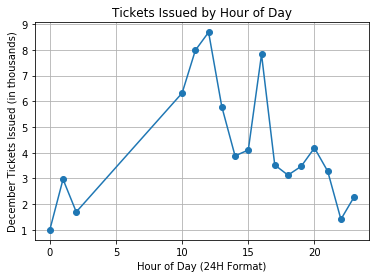

In [13]:
x = cleaned_hours["HOUR"]
tickets_hour = cleaned_hours["TICKETS ISSUED"]/1000
x_ticks = cleaned_hours["HOUR"]
plt.plot(x,tickets_hour,marker='o')
plt.grid()
plt.ylabel("December Tickets Issued (in thousands)")
plt.xlabel("Hour of Day (24H Format)")
plt.title("Tickets Issued by Hour of Day")
plt.savefig("Output/tickets_by_hour_dec18.png")

In [7]:
weekday_data = Parking2018[["OBJECTID","DAY OF WEEK","NUMBERED DAY OF WEEK"]]
weekday_data = weekday_data.rename({"OBJECTID":"TICKETS ISSUED"},axis=1)
weekday_data = weekday_data.groupby(["DAY OF WEEK"],as_index=False).agg({"TICKETS ISSUED":'count',"NUMBERED DAY OF WEEK":'sum'})
weekday_data["NUMBERED DAY OF WEEK"] = weekday_data["NUMBERED DAY OF WEEK"]/weekday_data["TICKETS ISSUED"]
weekday_data = weekday_data.sort_values(by=["NUMBERED DAY OF WEEK"])
weekday_data





,DAY OF WEEK,TICKETS ISSUED,NUMBERED DAY OF WEEK
1,Monday,16094,0.0
5,Tuesday,13981,1.0
6,Wednesday,18577,2.0
4,Thursday,19050,3.0
0,Friday,12689,4.0
2,Saturday,9191,5.0
3,Sunday,2180,6.0


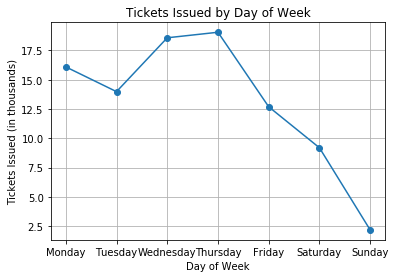

In [14]:
x = weekday_data["DAY OF WEEK"]
tickets_day = weekday_data["TICKETS ISSUED"]/1000
plt.plot(x,tickets_day,marker='o')
plt.grid()
plt.ylabel("Tickets Issued (in thousands)")
plt.xlabel("Day of Week")
plt.title("Tickets Issued by Day of Week")
plt.savefig("Output/tickets_by_dayofweek_dec18.png")